In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [166]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [167]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

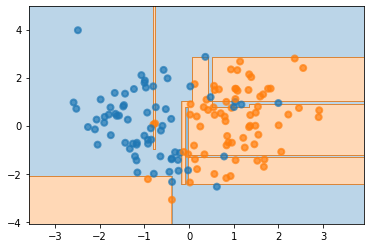

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
plot_surface(model, X_train, y_train)

In [170]:
(y_train == model.predict(X_train)).mean()

1.0

In [171]:
(y_test == model.predict(X_test)).mean()

0.8

In [172]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 2,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 2,
 'tree_': <sklearn.tree._tree.Tree at 0x2776fbffb90>}

__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [173]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)
    
    plt.legend(loc = 'lower right', prop={'size': 5})

In [174]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

depth=6, samples_leaf=3, train_acc=0.94375, test_acc=0.8
depth=6, samples_leaf=5, train_acc=0.925, test_acc=0.8
depth=6, samples_leaf=7, train_acc=0.9125, test_acc=0.8
depth=6, samples_leaf=10, train_acc=0.9, test_acc=0.8
depth=7, samples_leaf=3, train_acc=0.94375, test_acc=0.8
depth=7, samples_leaf=5, train_acc=0.925, test_acc=0.8
depth=7, samples_leaf=7, train_acc=0.9125, test_acc=0.8
depth=7, samples_leaf=10, train_acc=0.9, test_acc=0.8
depth=8, samples_leaf=3, train_acc=0.94375, test_acc=0.8
depth=8, samples_leaf=5, train_acc=0.925, test_acc=0.8
depth=8, samples_leaf=7, train_acc=0.9125, test_acc=0.8
depth=8, samples_leaf=10, train_acc=0.9, test_acc=0.8
depth=9, samples_leaf=3, train_acc=0.94375, test_acc=0.8
depth=9, samples_leaf=5, train_acc=0.925, test_acc=0.8
depth=9, samples_leaf=7, train_acc=0.9125, test_acc=0.8
depth=9, samples_leaf=10, train_acc=0.9, test_acc=0.8
depth=12, samples_leaf=3, train_acc=0.94375, test_acc=0.8
depth=12, samples_leaf=5, train_acc=0.925, test_acc=0.

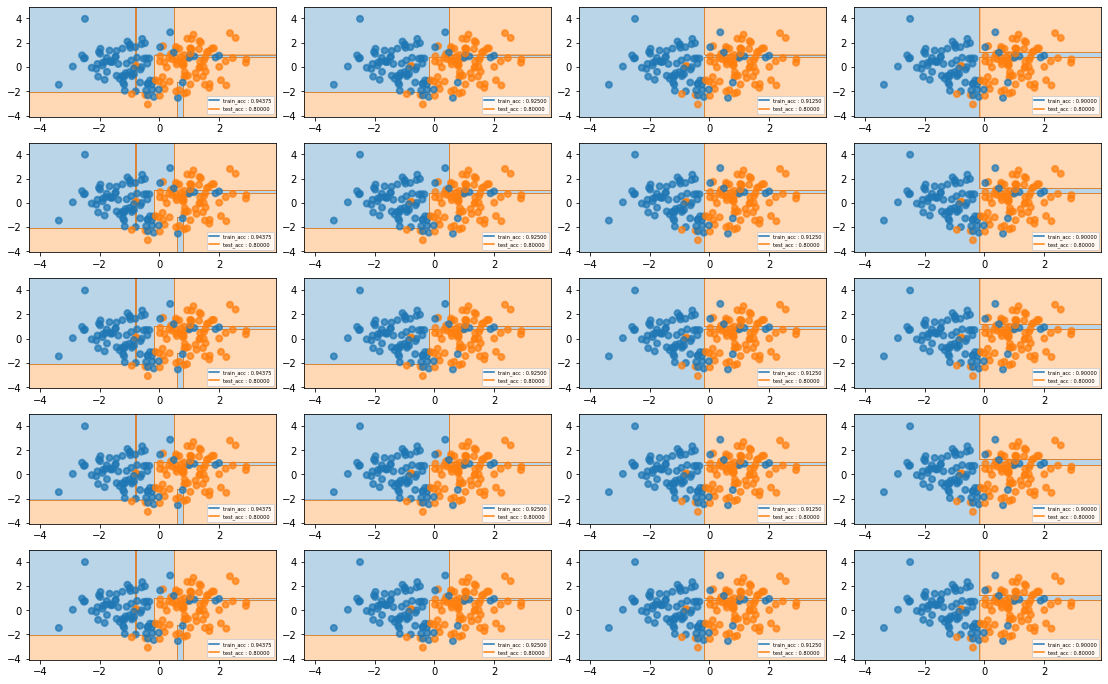

In [84]:
fig = plt.figure()
fig.set_size_inches(16, 10)

i = 1
for depth in max_depth_set:
    for samples_leaf in min_samples_leaf_set:
        model = DecisionTreeClassifier(max_depth=depth,
                                       min_samples_leaf=samples_leaf)
        model.fit(X_train, y_train)
        train_acc = (y_train == model.predict(X_train)).mean()
        test_acc = (y_test == model.predict(X_test)).mean()
        print(f'depth={depth}, samples_leaf={samples_leaf}, train_acc={train_acc}, test_acc={test_acc}')
        
        ax = plt.subplot(5, 4, i)
        plot_surface_axes(model, X_train, y_train, ax, train_acc, test_acc)
        i += 1

__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [177]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        # X_ = X_.drop([self.first_col, 
        #               #self.second_col #?????
        #              ], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [178]:
def linear_feature(x, y):
    return 2 * x - y

In [179]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [180]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('transform', CustomFunctionTransformer('x1', 'x2', linear_feature)), 
                 ('model', DecisionTreeClassifier(max_depth=3))])

Инициализировали класс!


In [181]:
pipe.fit(X_train, y_train)

Зафитили датасет!
Трансформировали датасет!


Pipeline(steps=[('transform',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function linear_feature at 0x000002776FC1B558>,
                                           second_col='x2')),
                ('model', DecisionTreeClassifier(max_depth=3))])

In [182]:
trs = CustomFunctionTransformer('x1', 'x2', linear_feature)

Инициализировали класс!


In [183]:
trs.transform(X_train)

Трансформировали датасет!


,x1,x2,new_feature
0,-0.182557,-2.461648,2.096533
1,1.883798,0.782433,2.985162
2,-1.092349,0.287622,-2.472320
3,-1.129710,-0.507833,-1.751586
4,-1.970049,1.507610,-5.447708
...,...,...,...
155,-1.209659,-1.277852,-1.141466
156,1.770796,1.535577,2.006015
157,1.346412,-0.060801,2.753624
158,-0.378923,-2.341745,1.583899


In [187]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(X)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [188]:
pipe.predict(X_train)

Трансформировали датасет!


array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1])

In [189]:
print((y_train == pipe.predict(X_train)).mean())
plot_surface(pipe, X_train, y_train)

Трансформировали датасет!
0.9375


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [154]:
print((y_test == pipe.predict(X_test)).mean())
plot_surface(pipe, X_test.values, y_test)

Трансформировали датасет!
0.775


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 432x288 with 0 Axes>